# torch.nn.Module

[![](https://mermaid.ink/img/pako:eNplUctqAzEM_BWhc9wPMKWn9lgotEdftGttYrqWF9kmhHT_vWZjktL1RcNoRi9fcUye0aIxxkkJZWYLJekoTyJONnacKefXQEel6ATa2xj4YslJrzdqvQWhyHmhkUGkZx6G9-TrzPCHX_9LPqg14cK6F_XQiyRjXvoE0CbmuCQlvUAuVFpWYajTxLr33Ds025nD8VSAxMMQKO_FHVvIdYgb7qLe-fnHmEdFPGBkjRR8O-i2gMNy4sgObYOe9Nuhk7XpqJb0eZERbdHKB6yLb3P3I6OdaM539s2H9iOdXH8B4JaMaw?type=png)](https://mermaid.live/edit#pako:eNplUctqAzEM_BWhc9wPMKWn9lgotEdftGttYrqWF9kmhHT_vWZjktL1RcNoRi9fcUye0aIxxkkJZWYLJekoTyJONnacKefXQEel6ATa2xj4YslJrzdqvQWhyHmhkUGkZx6G9-TrzPCHX_9LPqg14cK6F_XQiyRjXvoE0CbmuCQlvUAuVFpWYajTxLr33Ds025nD8VSAxMMQKO_FHVvIdYgb7qLe-fnHmEdFPGBkjRR8O-i2gMNy4sgObYOe9Nuhk7XpqJb0eZERbdHKB6yLb3P3I6OdaM539s2H9iOdXH8B4JaMaw)

- Module은 컴포지트 디자인 패턴에 따라 설계되었으며, 각 노드가 모듈인 트리 구조이다.
- `torch.nn.Module`은 인공신경망을 구성하는 모든 모듈이 상속하는 베이스 클래스이다.
- 사용자가 직접 정의하는 모델 또한 이 클래스를 상속해야 한다.
- 모듈은 다른 모듈을 포함할 수 있다.
- 그러므로 인공신경망을 중첩된 트리 구조로 만들 수 있다.
- 서브모듈은, 부모 모듈의 속성으로 포함된다.
- 부모 모듈의 속성으로 배정된 서브모듈은 자동으로 부모 모듈에 등록(register)된다.
- 따라서 `torch.Module.children()`의 이터레이터에서 반환된다.
- 다음 코드는 `MyModel`이란 클래스를 정의하고, 생성자에서 두 개의 서브모듈(Conv2d)을 추가한다.

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module): # 나만의 모델. `nn.Moudule`을 상속합니다.
    def __init__(self):
        super().__init__() # `nn.Module.__init__()`을 호출합니다.
        self.conv1 = nn.Conv2d(1, 20, 5) # 서브모듈 `conv1`을 지정합니다.
        self.conv2 = nn.Conv2d(20, 20, 5) # 서브모듈 `conv2`를 지정합니다.

    def forward(self, x):
        # 나만의 모델은 입력을 conv1, conv2에 순서대로 통과시키고,
        # 각각 `relu` 활성화 함수를 적용합니다.
        x = F.relu(self.conv1(x)) 
        return F.relu(self.conv2(x))

model = MyModel()
print(model)
# 내 모델에 등록된 자식 서브모듈을 확인하겠습니다.
for submodule in model.children():
    print(submodule)

MyModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)
Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))


## 모듈 추가 및 검색

- 서브모듈을 등록할 때는 직접 `module.속성이름 = submodule`처럼 해도 되지만,
- `Module.add_module(속성이름, submodule)`을 사용할 수 있다.

In [3]:
model.add_module('seq', torch.nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2)))
print(model)
print(model.seq)

MyModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=2, bias=True)
  )
)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)


- `get_submodule()`함수로 어떤 서브모듈을 트리 구조 안에서 찾을 수 있다.

In [4]:
print(model)
print(model.conv1 is model.get_submodule('conv1'))
print(model.conv2 is model.get_submodule('conv2'))
print(model.seq is model.get_submodule('seq'))
print(model.seq[0] is model.get_submodule('seq.0'))
print(model.seq[1] is model.get_submodule('seq.1'))
# model.get_submodule('foo') # AttributeError: MyModel has no attribute 'foo'

MyModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=2, bias=True)
  )
)
True
True
True
True
True


- `module.named_modules()`는 자기자신을 포함한 모든 자손 노드들을 이름과 함께 루프 돌 수 있다.

In [5]:
for name, module in model.named_modules():
    print("="*80)
    print("name : ", name)
    print("module : ", module)

name :  
module :  MyModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=2, bias=True)
  )
)
name :  conv1
module :  Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
name :  conv2
module :  Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
name :  seq
module :  Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)
name :  seq.0
module :  Linear(in_features=2, out_features=2, bias=True)
name :  seq.1
module :  Linear(in_features=2, out_features=2, bias=True)


## 파라미터(Parameter)

- 모듈은 가중치(weight)와 편향(bias)을 파라미터(Parameter) 객체로 저장한다.
- 모듈이 입력을 받아 예측을 하는 것을 `forward`라 부른다.
- 예측의 파라미터에 대한 편미분을 구하는 과정을 `bakcward`라 부른다.
- 그리고 그 편미분을 그래디언트(`gradient`)라 부른다.
- 파라미터를 그래디언트를 사용해 한 번 업데이트 하는 것을 `step`이라 한다.
- 그리고 업데이트 되는 파라미터는 학습 가능한 파라미터(`learnable parameter`)라 부른다.
- `torch.nn.Parameter`는 `torch.Tensor`를 상속한다.
- `torch.Module`의 속성으로 배정될 때 자동으로 모듈의 파라미터 목록에 등록된다.
- 따라서 `torch.Module.parameter()`의 이터레이터에서 반환된다.

In [14]:
# model.seq.0.bias 파라미터를 구해보겠습니다.
print(model.get_parameter('seq.0.bias'))
# my_param_1을 모델에 등록하겠습니다.
model.my_param_1 = torch.nn.parameter.Parameter(torch.randn(2,2))
# my_param_2를 모델에 등록하겠습니다.
model.register_parameter('my_param_2', torch.nn.parameter.Parameter(torch.zeros(2,2)))
# my_param_1을 구하겠습니다.
print(model.my_param_1)
# my_param_1을 `get_parameter`함수를 통해 구해보겠습니다.
print(model.my_param_1 is model.get_parameter('my_param_1'))
for param in model.parameters():
    # parameters()가 my_param_1을 포함하나요?
    if param is model.my_param_1:
        print("my_param_1을 찾았습니다.")
    # parameters()가 my_param_2를 포함하나요?
    if param is model.my_param_2:
        print("my_param_2를 찾았습니다.")
# my_param_1을 삭제하겠습니다.
model.register_parameter('my_param_1', None)
# my_param_2를 삭제하겠습니다.
model.my_param_2 = None

Parameter containing:
tensor([ 0.5992, -0.1465], requires_grad=True)
Parameter containing:
tensor([[ 0.0867, -0.8577],
        [ 1.1794, -0.4369]], requires_grad=True)
True
my_param_1을 찾았습니다.
my_param_2를 찾았습니다.


## 버퍼(buffer)

- `register_buffer(name, tensor, persistent=True)`를 통해 버퍼를 등록할 수 있다.
- 파라미터는 아니지만, 모델이 계산할 때 사용해야 하는 텐서를 등록할 때 사용한다.
  - 예를 들어 `BatchNorm`의 `running_mean` 등
- 버퍼는 파라미터처럼 유지(persist)된다. 그 말은 `save()` `load()`를 통해 저장된다는 뜻이다.
- `persistent=False`를 하면 유지되지 않는다.
- 퍼시스트 되는 속성은 모듈의 `state_dict`에 나열된다.
- 버퍼 또한 파라미터처럼 모듈의 속성으로 배정된다.

In [7]:
model.register_buffer('my_buffer_1', torch.eye(2))
model.register_buffer('my_buffer_2', torch.eye(3))
for buffer in model.buffers():
    print(buffer)
print(model.my_buffer_1 is model.get_buffer('my_buffer_1'))

tensor([[1., 0.],
        [0., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
True


## 일괄 작업, 캐스팅 및 장치 전환

- 트리 구조에서 자신을 포함한 모든 자손에 각각 어떤 함수를 적용하고 싶다면, `Module.apply()`함수를 사용한다.
- 이 함수는 트리 내의 모든 모듈의 파라미터를 초기화 하는 데에 자주 쓰인다.

In [8]:
def print_model(m):
    print(f" * {m}")
returned = model.apply(print_model)

 * Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
 * Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
 * Linear(in_features=2, out_features=2, bias=True)
 * Linear(in_features=2, out_features=2, bias=True)
 * Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)
 * MyModel(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (seq): Sequential(
    (0): Linear(in_features=2, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=2, bias=True)
  )
)


- `apply`는 적용할 함수를 직접 지정하지만, 일괄적으로 적용하는 작업중 자주 사용하는 것들은 함수가 만들어져 있다.
- `zero_grad()` 함수는 모든 파라미터의 그래디언트를 0으로 설정한다.
- `bfloat16()`, `double()`, `float()`, `half()`, `type(dst_type)` 함수는 모듈과 자손 모듈에 속한 모든 파라미터와 버퍼에 타입 캐스팅을 실시한다.
- `cuda()`, `ipu()`, `xpu()`, `to(device)` 함수는 모듈과 자손 모듈에 속한 모든 파라미터와 버퍼를 특정 장치로 이동시킨다.
- `to(device)`의 경우, 장치가 지원하는 것에 알맞게 타입 캐스팅도 함께 수행하도록 지정할 수 있으나, 정수 타입인 텐서는 캐스팅 대상에서 제외된다.
- `to_empty`는 다른 장치로 파라미터와 버퍼를 전송하지만, 그 스토리지를 복사하지 않는다.

## 모듈의 훈련 모드

- 모듈은 두 가지 모드(mode)가 있으며, 훈련 모드와(train mode)와 평가 모드(eval mode)이다.
- 이 모드는 `DropOut`, `BatchNorm` 등 특정 모듈의 행동에 영향을 미친다.
- `Module.train(True)`로 훈련 모드를 활성화 할 수 있다.
- `Module.train(False)` 혹은 `Module.eval()`로 평가 모드를 활성화 할 수 있다.
- 모듈이 현재 훈련 모드에 있는 지는 `Module.traning` 속성으로 확인할 수 있다.

In [9]:
print(model.training)
model.train(False)
print(model.training)
model.train(True)
print(model.training)

True
False
True


## UninitializedParameter와 UninitializedBuffer

- `torch.UninitializedParameter`와 `torch.UninitializedBuffer`는 각각 아직 초기화되지 않은 파라미터와 버퍼를 나타내는 클래스이다.
- 초기화되지 않았으므로, 대부분의 연산이나 쿼리는 `RuntimeError`를 일으킨다.
- 다만 초기화가 되기 전에 미리 `dtype`과 `device`를 정해줄 수는 있다.

## state_dict를 활용한 모델의 저장 및 불러오기

- `Module.state_dict`은 파이썬의 딕셔너리 형식(`collections.OrderedDict`)의 객체이다.
- `state_dict`는 자기자신을 포함한 모듈 트리 내의 모든 파라미터와 버퍼의 상태를 담고 있다.

In [10]:
print(model.state_dict().keys())
print(model.get_parameter('seq.0.bias'))
print(model.get_buffer('my_buffer_1'))

odict_keys(['my_buffer_1', 'my_buffer_2', 'conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'seq.0.weight', 'seq.0.bias', 'seq.1.weight', 'seq.1.bias'])
Parameter containing:
tensor([ 0.5992, -0.1465], requires_grad=True)
tensor([[1., 0.],
        [0., 1.]])


- `state_dict`는 모델의 파라미터를 쉽게 저장하고 로드할 수 있도록 도와준다.
- `static_dict`은 다양한 활동에서 요긴하게 쓰인다:
  - 모델 저장 및 로딩 : 훈련이 끝난 모델의 파라미터를 파일로 저장할 수 있다. 훈련이 마무리된 시점을 로딩해와 계속해서 더더욱 훈련시킬 수 있고 내 모델을 남들과 공유할 수 있다. 남들은 내 모델을 가져다가 자기 입맛에 맞게 훈련시키거나 자기 프로그램에 인퍼런스용으로 활용할 수 있다.
  - 체크포인트: 어느 시점에서의 모델의 상태를 저장했다가 나중에 훈련이 잘못되었다고 생각하면 되돌아올 수 있다.
  - 전이 학습: 전이 학습을 할때 쉽게 다른 모델의 파라미터를 복사해올 수 있다.
  - 모델 호환성: 모델의 구조와 관계없이, 파라미터만을 가지고 있으므로 다른 모델로 이식하기 좋다.
  - 파인튜닝: 파인튜닝을 위해 몇몇 레이어를 얼릴 때 state_dict를 통해 파라미터를 쭉 살펴보고 어느 것을 얼릴 지 고를 수 있다.
- `torch.save()`를 호출하면 `state_dict`의 내용이 파일로 저장된다.
- `torch.load()`를 호출하면 파일에 저장된 `state_dict`를 로드할 수 있다. 이후, 모델은 `Module.load_state_dict()`를 호출하여 `state_dict`의 내용으로 자신의 파라미터를 덮어쓴다.

In [11]:
import torch
import torch.nn as nn

# Create a simple model
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(10, 5)
        self.fc2 = nn.Linear(5, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
simple_model = SimpleModel()

# Save the state_dict
torch.save(simple_model.state_dict(), 'model_state_dict.pth') # 파일 쓰기 권한이 없으면 여기서 실패합니다.

# Load the state_dict into a new instance of the model
simple_model = SimpleModel()
simple_model.load_state_dict(torch.load('model_state_dict.pth'))

<All keys matched successfully>

#### 훅

- 모듈의 작업 과정의 여러 부분에 훅을 설정하여, 작업을 감시할 수 있다.
  - `torch.nn.Module.register_backward_hook(hook)`
  - `torch.nn.Module.register_forward_hook(hook, *, prepend=False, with_kwargs=False)`
  - `torch.nn.Module.register_forward_pre_hook(hook, *, prepend=False, with_kwargs=False)`
  - `torch.nn.Module.register_full_backward_hook(hook, prepend=False)`
  - `torch.nn.Module.register_full_backward_pre_hook(hook, prepend=False)`
  - `torch.nn.Module.register_load_state_dict_post_hook(hook)`
  - `torch.nn.Module.register_state_dict_pre_hook(hook)`
- 이 함수들은 `torch.utils.hooks.RemovableHandle`타입의 객체를 반환한다.
- 이 `RemovableHandle` 객체의 `.remove()`함수를 부르면 훅이 제거된다.
- 혹은 `RemovableHandle` 객체를 컨텍스트 매니저로 사용할 수 있다.
- 훅은 모델을 디버깅할 때 중간중간 출력의 결과를 출력하는 것에 유용하다.
- 다음 코드는 모듈의 자손들 중에 리프 노드인 것들만 골라서 출력의 형태를 콘솔에 써주도록 훅을 건다.

In [12]:
# 훅을 걸어주는 함수입니다.
def report_output_shape(module):
    handles = {}
    for name, module in model.named_modules():
        if len(list(module.children())) == 0:
            handles[name] = module.register_forward_hook(lambda module, _, output: print(str(module).partition('\n')[0].rjust(90), " → ", output.shape))
    return handles

# 테스트를 위해 입력을 준비합니다.
input = torch.randn((1, 1, 10, 10))
# 모델에 훅을 걸어줍니다.
handles = report_output_shape(model)
# forward를 호출합니다. 여기서 forward_hook이 호출됩니다.
model.forward(input)

# 모든 훅을 해제합니다.
for handle in handles.values():
    handle.remove()

                                          Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))  →  torch.Size([1, 20, 6, 6])
                                         Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))  →  torch.Size([1, 20, 2, 2])


## 모듈 트리의 가시화

- [netron](https://netron.app/)을 사용하여 모델의 예측 과정을 가시화 할 수 있다.
- `torch.onnx.export`를 사용하여 내 모델이 입력에 대해 예측한 결과를 `.onnx`파일로 저장한다.
- 저장한 파일을 netron 앱으로 열어본다.

In [13]:
input = torch.randn(1,1,24,24)
torch.onnx.export(model, input, f='exported_model.onnx')

- 다음 사진은 위에서 만든 `model`을 실행한 결과를 보여준다.  
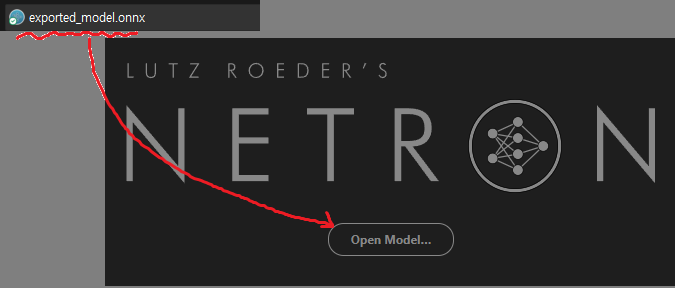
![Alt text](image.png)

## 미리 정의된 모듈

- 사용자는 자신의 모델을 만들기 위해 `Module` 클래스를 상속하여 `forward()` 함수를 오버라이드한다.
- 그것 말고도 `torch` 라이브러리가 미리 구현해둔 수많은 모듈이 있다.
  - 컨테이너(Container)
    - Module : Base class for all neural network modules.
    - Sequential : A sequential container.
    - ModuleList : Holds submodules in a list.
    - ModuleDict : Holds submodules in a dictionary.
    - ParameterList : Holds parameters in a list.
    - ParameterDict : Holds parameters in a dictionary.
  - 컨볼루션 레이어(Convolution Layer)
    - nn.Conv1d : Applies a 1D convolution over an input signal composed of several input planes.
    - nn.Conv2d : Applies a 2D convolution over an input signal composed of several input planes.
    - nn.Conv3d : Applies a 3D convolution over an input signal composed of several input planes.
    - nn.ConvTranspose1d : Applies a 1D transposed convolution operator over an input image composed of several input planes.
    - nn.ConvTranspose2d : Applies a 2D transposed convolution operator over an input image composed of several input planes.
    - nn.ConvTranspose3d : Applies a 3D transposed convolution operator over an input image composed of several input planes.
    - nn.LazyConv1d  : A torch.nn.Conv1d module with lazy initialization of the in_channels argument of the Conv1d that is inferred from the input.size(1).
    - nn.LazyConv2d : A torch.nn.Conv2d module with lazy initialization of the in_channels argument of the Conv2d that is inferred from the input.size(1).
    - nn.LazyConv3d : A torch.nn.Conv3d module with lazy initialization of the in_channels argument of the Conv3d that is inferred from the input.size(1).
    - nn.LazyConvTranspose1d : A torch.nn.ConvTranspose1d module with lazy initialization of the in_channels argument of the ConvTranspose1d that is inferred from the input.size(1).
    - nn.LazyConvTranspose2d : A torch.nn.ConvTranspose2d module with lazy initialization of the in_channels argument of the ConvTranspose2d that is inferred from the input.size(1).
    - nn.LazyConvTranspose3d : A torch.nn.ConvTranspose3d module with lazy initialization of the in_channels argument of the ConvTranspose3d that is inferred from the input.size(1).
    - nn.Unfold : Extracts sliding local blocks from a batched input tensor.
  - 풀링 레이어(Pooling Layer)
    - nn.Fold : Combines an array of sliding local blocks into a large containing tensor.
    - nn.MaxPool1d : Applies a 1D max pooling over an input signal composed of several input planes.
    - nn.MaxPool2d : Applies a 2D max pooling over an input signal composed of several input planes.
    - nn.MaxPool3d : Applies a 3D max pooling over an input signal composed of several input planes.
    - nn.MaxUnpool1d : Computes a partial inverse of MaxPool1d.
    - nn.MaxUnpool2d : Computes a partial inverse of MaxPool2d.
    - nn.MaxUnpool3d : Computes a partial inverse of MaxPool3d.
    - nn.AvgPool1d : Applies a 1D average pooling over an input signal composed of several input planes.
    - nn.AvgPool2d : Applies a 2D average pooling over an input signal composed of several input planes.
    - nn.AvgPool3d : Applies a 3D average pooling over an input signal composed of several input planes.
    - nn.FractionalMaxPool2d : Applies a 2D fractional max pooling over an input signal composed of several input planes.
    - nn.FractionalMaxPool3d : Applies a 3D fractional max pooling over an input signal composed of several input planes.
    - nn.LPPool1d : Applies a 1D power-average pooling over an input signal composed of several input planes.
    - nn.LPPool2d : Applies a 2D power-average pooling over an input signal composed of several input planes.
    - nn.AdaptiveMaxPool1d : Applies a 1D adaptive max pooling over an input signal composed of several input planes.
    - nn.AdaptiveMaxPool2d : Applies a 2D adaptive max pooling over an input signal composed of several input planes.
    - nn.AdaptiveMaxPool3d : Applies a 3D adaptive max pooling over an input signal composed of several input planes.
    - nn.AdaptiveAvgPool1d : Applies a 1D adaptive average pooling over an input signal composed of several input planes.
    - nn.AdaptiveAvgPool2d : Applies a 2D adaptive average pooling over an input signal composed of several input planes.
    - nn.AdaptiveAvgPool3d : Applies a 3D adaptive average pooling over an input signal composed of several input planes.
  - 패딩 레이어(Padding Layer)
    - nn.ReflectionPad1d : Pads the input tensor using the reflection of the input boundary.
    - nn.ReflectionPad2d : Pads the input tensor using the reflection of the input boundary.
    - nn.ReflectionPad3d : Pads the input tensor using the reflection of the input boundary.
    - nn.ReplicationPad1d : Pads the input tensor using replication of the input boundary.
    - nn.ReplicationPad2d : Pads the input tensor using replication of the input boundary.
    - nn.ReplicationPad3d : Pads the input tensor using replication of the input boundary.
    - nn.ZeroPad2d : Pads the input tensor boundaries with zero.
    - nn.ConstantPad1d : Pads the input tensor boundaries with a constant value.
    - nn.ConstantPad2d : Pads the input tensor boundaries with a constant value.
    - nn.ConstantPad3d : Pads the input tensor boundaries with a constant value.
  - 비선형 활성화 함수(Non-linear Activations. weighted sum, nonlinearity)
    - nn.ELU : Applies the Exponential Linear Unit (ELU) function, element-wise, as described in the paper: Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs).
    - nn.Hardshrink : Applies the Hard Shrinkage (Hardshrink) function element-wise.
    - nn.Hardsigmoid : Applies the Hardsigmoid function element-wise.
    - nn.Hardtanh : Applies the HardTanh function element-wise.
    - nn.Hardswish : Applies the Hardswish function, element-wise, as described in the paper: Searching for MobileNetV3.
    - nn.LeakyReLU : Applies the element-wise function:
    - nn.LogSigmoid : Applies the element-wise function:
    - nn.MultiheadAttention : Allows the model to jointly attend to information from different representation subspaces as described in the paper: Attention Is All You Need.
    - nn.PReLU : Applies the element-wise function:
    - nn.ReLU : Applies the rectified linear unit function element-wise:
    - nn.ReLU6 : Applies the element-wise function:
    - nn.RReLU : Applies the randomized leaky rectified liner unit function, element-wise, as described in the paper:
    - nn.SELU : Applied element-wise, as:
    - nn.CELU : Applies the element-wise function:
    - nn.GELU : Applies the Gaussian Error Linear Units function:
    - nn.Sigmoid : Applies the element-wise function:
    - nn.SiLU : Applies the Sigmoid Linear Unit (SiLU) function, element-wise.
    - nn.Mish : Applies the Mish function, element-wise.
    - nn.Softplus : Applies the Softplus function $Softplus(x)=\frac{1}{β}​∗\log(1+\exp(β∗x))$ element-wise.
    - nn.Softshrink : Applies the soft shrinkage function elementwise:
    - nn.Softsign : Applies the element-wise function:
    - nn.Tanh : Applies the Hyperbolic Tangent (Tanh) function element-wise.
    - nn.Tanhshrink : Applies the element-wise function:
    - nn.Threshold : Thresholds each element of the input Tensor.
    - nn.GLU : Applies the gated linear unit function $GLU(a,b)=a⊗σ(b)$ where $a$ is the first half of the input matrices and $b$ is the second half.
  - 비선형 활성화 함수(기타)
    - nn.Softmin : Applies the Softmin function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0, 1] and sum to 1.
    - nn.Softmax : Applies the Softmax function to an n-dimensional input Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0, 1] and sum to 1.
    - nn.Softmax2d : Applies SoftMax over features to each spatial location.
    - nn.LogSoftmax : Applies the $\log(Softmax(x))$ function to an n-dimensional input Tensor.
    - nn.AdaptiveLogSoftmaxWithLoss : Efficient softmax approximation as described in Efficient softmax approximation for GPUs by Edouard Grave, Armand Joulin, Moustapha Cissé, David Grangier, and Hervé Jégou.
  - 정규화 레이어(Normalization Layers)
    - nn.BatchNorm1d : Applies Batch Normalization over a 2D or 3D input as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
    - nn.BatchNorm2d : Applies Batch Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
    - nn.BatchNorm3d : Applies Batch Normalization over a 5D input (a mini-batch of 3D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
    - nn.LazyBatchNorm1d : A torch.nn.BatchNorm1d module with lazy initialization of the num_features argument of the BatchNorm1d that is inferred from the input.size(1).
    - nn.LazyBatchNorm2d : A torch.nn.BatchNorm2d module with lazy initialization of the num_features argument of the BatchNorm2d that is inferred from the input.size(1).
    - nn.LazyBatchNorm3d : A torch.nn.BatchNorm3d module with lazy initialization of the num_features argument of the BatchNorm3d that is inferred from the input.size(1).
    - nn.GroupNorm : Applies Group Normalization over a mini-batch of inputs as described in the paper Group Normalization
    - nn.SyncBatchNorm : Applies Batch Normalization over a N-Dimensional input (a mini-batch of [N-2]D inputs with additional channel dimension) as described in the paper Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift .
    - nn.InstanceNorm1d : Applies Instance Normalization over a 2D (unbatched) or 3D (batched) input as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.
    - nn.InstanceNorm2d : Applies Instance Normalization over a 4D input (a mini-batch of 2D inputs with additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.
    - nn.InstanceNorm3d : Applies Instance Normalization over a 5D input (a mini-batch of 3D inputs with additional channel dimension) as described in the paper Instance Normalization: The Missing Ingredient for Fast Stylization.
    - nn.LazyInstanceNorm1d : A torch.nn.InstanceNorm1d module with lazy initialization of the num_features argument of the InstanceNorm1d that is inferred from the input.size(1).
    - nn.LazyInstanceNorm2d : A torch.nn.InstanceNorm2d module with lazy initialization of the num_features argument of the InstanceNorm2d that is inferred from the input.size(1).
    - nn.LazyInstanceNorm3d : A torch.nn.InstanceNorm3d module with lazy initialization of the num_features argument of the InstanceNorm3d that is inferred from the input.size(1).
    - nn.LayerNorm : Applies Layer Normalization over a mini-batch of inputs as described in the paper Layer Normalization
    - nn.LocalResponseNorm : Applies local response normalization over an input signal composed of several input planes, where channels occupy the second dimension.
  - RNN 레이어(Recurrent Layers)
    - nn.RNNBase : 
    - nn.RNN : Applies a multi-layer Elman RNN with tanh⁡tanh or ReLU non-linearity to an input sequence.
    - nn.LSTM : Applies a multi-layer long short-term memory (LSTM) RNN to an input sequence.
    - nn.GRU : Applies a multi-layer gated recurrent unit (GRU) RNN to an input sequence.
    - nn.RNNCell : An Elman RNN cell with tanh or ReLU non-linearity.
    - nn.LSTMCell : A long short-term memory (LSTM) cell.
    - nn.GRUCell : A gated recurrent unit (GRU) cell
  - 트랜스포머 레이어(Transformer Layers)
    - nn.Transformer : A transformer model.
    - nn.TransformerEncoder : TransformerEncoder is a stack of N encoder layers.
    - nn.TransformerDecoder : TransformerDecoder is a stack of N decoder layers
    - nn.TransformerEncoderLayer : TransformerEncoderLayer is made up of self-attn and feedforward network.
    - nn.TransformerDecoderLayer : TransformerDecoderLayer is made up of self-attn, multi-head-attn and feedforward network.
  - 선형 레이어(Linear Layers)
    - nn.Identity : A placeholder identity operator that is argument-insensitive.
    - nn.Linear : Applies a linear transformation to the incoming data: $y=xA^T+b$
    - nn.Bilinear : Applies a bilinear transformation to the incoming data: $y=x^T_1​Ax_2​+b$
    - nn.LazyLinear : A torch.nn.Linear module where in_features is inferred.
  - 드롭아웃 레이어(Dropout Layers)
    - nn.Dropout : During training, randomly zeroes some of the elements of the input tensor with probability p using samples from a Bernoulli distribution.
    - nn.Dropout1d : Randomly zero out entire channels (a channel is a 1D feature map, e.g., the $j$-th channel of the $i$-th sample in the batched input is a 1D tensor $\text{input}[i,j]$).
    - nn.Dropout2d : Randomly zero out entire channels (a channel is a 2D feature map, e.g., the $j$-th channel of the $i$-th sample in the batched input is a 2D tensor $\text{input}[i,j]$).
    - nn.Dropout3d : Randomly zero out entire channels (a channel is a 3D feature map, e.g., the $j$-th channel of the $i$-th sample in the batched input is a 3D tensor $\text{input}[i,j]$).
    - nn.AlphaDropout : Applies Alpha Dropout over the input.
    - nn.FeatureAlphaDropout : Randomly masks out entire channels. a channel is a feature map.
  - 희소 레이어(Sparse Layers)
    - nn.Embedding : A simple lookup table that stores embeddings of a fixed dictionary and size.
    - nn.EmbeddingBag : Computes sums or means of 'bags' of embeddings, without instantiating the intermediate embeddings.
  - 거리 함수(Distance Functions)
    - nn.CosineSimilarity : Returns cosine similarity between $x_1$​ and $x_2$​, computed along dim.
    - nn.PairwiseDistance : Computes the pairwise distance between input vectors, or between columns of input matrices.
  - 로스 함수(Loss Functions)
    - nn.L1Loss : Creates a criterion that measures the mean absolute error (MAE) between each element in the input $x$ and target $y$.
    - nn.MSELoss : Creates a criterion that measures the mean squared error (squared L2 norm) between each element in the input $x$ and target $y$.
    - nn.CrossEntropyLoss : This criterion computes the cross entropy loss between input logits and target.
    - nn.CTCLoss : The Connectionist Temporal Classification loss.
    - nn.NLLLoss : The negative log likelihood loss.
    - nn.PoissonNLLLoss : Negative log likelihood loss with Poisson distribution of target.
    - nn.GaussianNLLLoss : Gaussian negative log likelihood loss.
    - nn.KLDivLoss : The Kullback-Leibler divergence loss.
    - nn.BCELoss : Creates a criterion that measures the Binary Cross Entropy between the target and the input probabilities:
    - nn.BCEWithLogitsLoss : This loss combines a Sigmoid layer and the BCELoss in one single class.
    - nn.MarginRankingLoss : Creates a criterion that measures the loss given inputs $x_1$, $x_2$, two 1D mini-batch or 0D Tensors, and a label 1D mini-batch or 0D Tensor $y$ (containing 1 or -1).
    - nn.HingeEmbeddingLoss : Measures the loss given an input tensor $x$ and a labels tensor $y$ (containing 1 or -1).
    - nn.MultiLabelMarginLoss : Creates a criterion that optimizes a multi-class multi-classification hinge loss (margin-based loss) between input $x$ (a 2D mini-batch Tensor) and output $y$ (which is a 2D Tensor of target class indices).
    - nn.HuberLoss : Creates a criterion that uses a squared term if the absolute element-wise error falls below delta and a delta-scaled L1 term otherwise.
    - nn.SmoothL1Loss : Creates a criterion that uses a squared term if the absolute element-wise error falls below beta and an L1 term otherwise.
    - nn.SoftMarginLoss : Creates a criterion that optimizes a two-class classification logistic loss between input tensor $x$ and target tensor $y$ (containing 1 or -1).
    - nn.MultiLabelSoftMarginLoss : Creates a criterion that optimizes a multi-label one-versus-all loss based on max-entropy, between input $x$ and target $y$ of size $(N,C)$.
    - nn.CosineEmbeddingLoss : Creates a criterion that measures the loss given input tensors $x_1$​, $x_2$​ and a Tensor label $y$ with values 1 or -1.
    - nn.MultiMarginLoss : Creates a criterion that optimizes a multi-class classification hinge loss (margin-based loss) between input $x$ (a 2D mini-batch Tensor) and output $y$ (which is a 1D tensor of target class indices, $0≤y≤x.size(1)−1$):
    - nn.TripletMarginLoss : Creates a criterion that measures the triplet loss given an input tensors $x_1$, $x_2$, $x_3$ and a margin with a value greater than 00.
    - nn.TripletMarginWithDistanceLoss : Creates a criterion that measures the triplet loss given input tensors $a$, $p$, and $n$ (representing anchor, positive, and negative examples, respectively), and a nonnegative, real-valued function ("distance function") used to compute the relationship between the anchor and positive example ("positive distance") and the anchor and negative example ("negative distance").
  - 비전 레이어(Vision Layers)
    - nn.PixelShuffle : Rearranges elements in a tensor of shape $(∗,C×r2,H,W)$ to a tensor of shape $(∗,C,H×r,W×r)$, where r is an upscale factor.
    - nn.PixelUnshuffle : Reverses the PixelShuffle operation by rearranging elements in a tensor of shape $(∗,C,H×r,W×r)$ to a tensor of shape $(∗,C×r2,H,W)$, where r is a downscale factor.
    - nn.Upsample : Upsamples a given multi-channel 1D (temporal), 2D (spatial) or 3D (volumetric) data.
    - nn.UpsamplingNearest2d : Applies a 2D nearest neighbor upsampling to an input signal composed of several input channels.
    - nn.UpsamplingBilinear2d : Applies a 2D bilinear upsampling to an input signal composed of several input channels.
  - 셔플 레이어(Shuffle Layers)
    - nn.ChannelShuffle : Divide the channels in a tensor of shape $(∗,C,H,W)$ into g groups and rearrange them as $(∗,C,g​g,H,W)$, while keeping the original tensor shape.
  - DataParallel 레이어(multi-GPU, 분산 컴퓨팅)
    - nn.DataParallel : Implements data parallelism at the module level.
    - nn.parallel.DistributedDataParallel : Implements distributed data parallelism that is based on torch.distributed package at the module level.